<a href="https://colab.research.google.com/github/gheniabla/AdvancedPython/blob/main/chapter23_IterablesIteratorsGeneratorsClosuresDecorators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 23 - Iterables, Iterators, Generators, Closures and Decorators
The general idea behind web scraping is to retrieve data that exists on a website, and convert it into a format that is usable for analysis. The assumption with scraping is webpages are rendered by the brower from HTML and CSS code, but much of the information included in the HTML underlying any website is not interesting to us.

##  22.1 HTML page structure

**Hypertext Markup Language (HTML)** is the standard markup language for documents designed to be displayed in a web browser. HTML describes the structure of a web page and it can be used with **Cascading Style Sheets (CSS)** and a scripting language such as **JavaScript** to create interactive websites. HTML consists of a series of elements that "tell" to the browser how to display the content. Lastly, elements are represented by **tags**.

Here are some tags:
* `<!DOCTYPE html>` declaration defines this document to be HTML5.  
* `<html>` element is the root element of an HTML page.  
* `<div>` tag defines a division or a section in an HTML document. It's usually a container for other elements.
* `<head>` element contains meta information about the document.  
* `<title>` element specifies a title for the document.  
* `<body>` element contains the visible page content.  
* `<h1>` element defines a large heading.  
* `<p>` element defines a paragraph.  
* `<a>` element defines a hyperlink.

HTML tags normally come in pairs like `<p>` and `</p>`. The first tag in a pair is the opening tag, the second tag is the closing tag. The end tag is written like the start tag, but with a slash inserted before the tag name.
The folliwng image shows the tree stucture of common HTML tags.


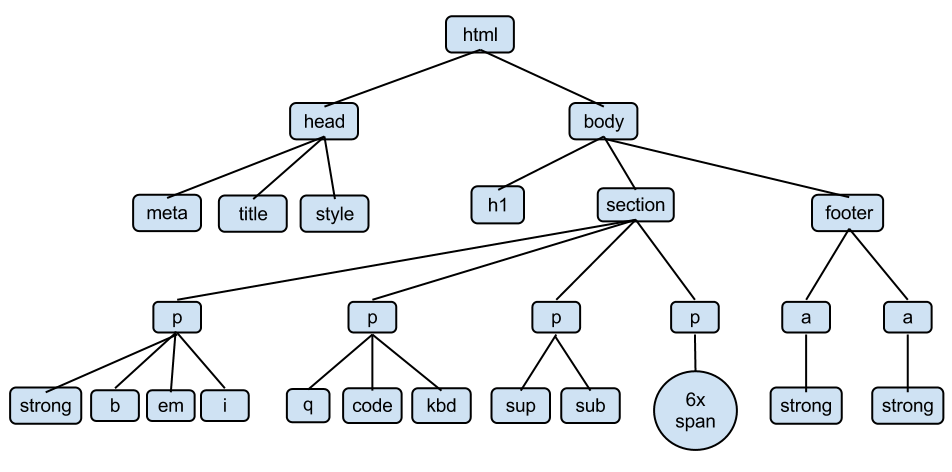

In [ ]:
from IPython.display import Image
Image('http://www.openbookproject.net/tutorials/getdown/css/images/lesson4/HTMLDOMTree.png')

Most modern browsers have a parser that reads in the HTML document, parses it into a DOM (Document Object Model) structure, and then renders the DOM structure.

Much like HTTP, the DOM is an agreed-upon standard: https://dom.spec.whatwg.org/


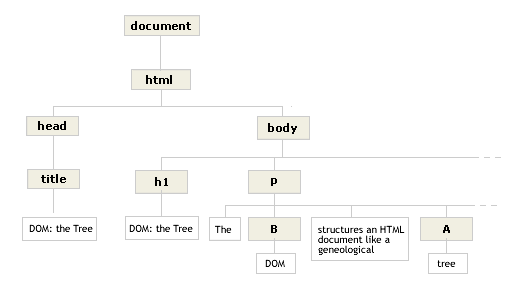

In [ ]:
from IPython.display import Image
Image('https://staff.washington.edu/weller/css/img/DOMtree.gif')

## 21.2 Creating a simple HTML page

Let's try to a create a simple HTML webpage and render it here with the help of the IPython's core.display component.

In [ ]:
from IPython.core.display import display, HTML

display(HTML("""
<!DOCTYPE html>
<html lang="en" dir="ltr">
<head>
  <title>Intro to HTML</title>
</head>

<body>
  <h1>Heading h1</h1>
  <h2>Heading h2</h2>
  <h3>Heading h3</h3>
  <h4>Heading h4</h4>

  <p>
    That's a text paragraph. You can also <b>bold</b>, <mark>mark</mark>, <ins>underline</ins>, <del>strikethrough</del> and <i>emphasize</i> words.
    You can also add links - here's one to <a href="https://en.wikipedia.org/wiki/Main_Page">Wikipedia</a>.
  </p>

  <p>
    This <br> is a paragraph <br> with <br> line breaks
  </p>

  <p style="color:red">
    Add colour to your paragraphs.
  </p>

  <p>Unordered list:</p>
  <ul>
    <li>Python</li>
    <li>Java</li>
    <li>Rust</li>
  </ul>

  <p>Ordered list:</p>
  <ol>
    <li>Data collection</li>
    <li>Exploratory data analysis</li>
    <li>Data analysis</li>
    <li>Report</li>
  </ol>
  <hr>

  <!-- This is a comment -->

</body>
</html>
"""))

##  22.3 Inspecting HTML Source Code

Suppose we want to scrape faculty emails from the Palomat CSIT Department directory (https://www.palomar.edu/csit/). Once we have identified a web page that we want to scrape, the next step is to study the HTML source code. All web browsers have a "View Source" or "Page Source" feature that will display the HTML source of a web page.

Visit the web page above, and view the HTML source of that page. (You may have to search online to figure out how to view the page source in your favorite browser.) Scroll down until you find the HTML code for the  e-mails of the faculty members.

Notice how difficult it can be to find a page element in the HTML source. Many browsers allow you to right-click on a page element and jump to the part of the HTML source corresponding to that element.

We also can read the source code for the web page and creating a Beautiful Soup object with the BeautifulSoup function. The BeautifulSoup is a Python library for pulling data out of HTML and XML files. It provides methods to navigate the document's tree structure.

In [ ]:
from bs4 import BeautifulSoup
import urllib.request

with urllib.request.urlopen("https://www.palomar.edu/csit/") as url:
    s = url.read()

soup = BeautifulSoup(s)
print(type(soup))


<class 'bs4.BeautifulSoup'>


In [ ]:
#let's print 1000 chars in the beginning
print(soup.prettify()[0:1000])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <title>
   CSIT Department
  </title>
  <meta content="max-image-preview:large" name="robots"/>
  <link href="//use.fontawesome.com" rel="dns-prefetch"/>
  <link href="//cdn.jsdelivr.net" rel="dns-prefetch"/>
  <link href="//cdnjs.cloudflare.com" rel="dns-prefetch"/>
  <link href="https://www.palomar.edu/csit/feed/" rel="alternate" title="CSIT Department » Feed" type="application/rss+xml"/>
  <link href="https://www.palomar.edu/csit/comments/feed/" rel="alternate" title="CSIT Department » Comments Feed" type="application/rss+xml"/>
  <link href="https://www.palomar.edu/csit/sample-page-2/feed/" rel="alternate" title="CSIT Department » Welcome to the Computer Science and Information Technology Department (CSIT) Comments Feed" type="application/rss+xml"/>
  <script>
   window._wpemojiSettings = {"baseUrl":"https:\/\/s.w.org\/images\/core\/emoji\/1

In [ ]:
import re

from bs4 import BeautifulSoup
import urllib.request

with urllib.request.urlopen("https://www.palomar.edu/csit/") as url:
    s = url.read()

soup = BeautifulSoup(s)

text = soup.get_text()
list = re.findall(r'[a-z0-9]+@palomar.edu', text)
for email in list:
    print(email)

dnguyen@palomar.edu
awsmith@palomar.edu
tcanon@palomar.edu
rburgher@palomar.edu
sperry@palomar.edu
rgreen@palomar.edu
dmeske@palomar.edu
tcanon@palomar.edu
astauffer@palomar.edu


##  22.4 Web Scraping with requests and BeautifulSoup

We will use requests and BeautifulSoup to access and scrape the content of inspirational-quotes page: http://www.values.com/inspirational-quotes

In [ ]:
import requests
from bs4 import BeautifulSoup

URL = "http://www.values.com/inspirational-quotes"
r = requests.get(URL)

soup = BeautifulSoup(r.content, 'html5lib') # If this line causes an error, run 'pip install html5lib' or install html5lib
print(soup.prettify())


<!DOCTYPE html>
<html class="no-js" dir="ltr" lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width,initial-scale=1.0" name="viewport"/>
  <title>
   Inspirational Quotes - Motivational Quotes - | The Foundation for a Better Life
  </title>
  <meta content="Find the perfect quotation from our hand-picked collection of inspiring quotes by hundreds of authors." name="description"/>
  <meta content="pass, it, on, passiton, values, kindness" name="keywords"/>
  <meta content="The Foundation for a Better Life" name="twitter:site_name"/>
  <meta content="@passiton_values" name="twitter:site"/>
  <meta content="summary" name="twitter:card"/>
  <meta content="Thank you for visiting." name="twitter:description"/>
  <meta content="https://www.passiton.com/passiton_fbl.jpg" name="twitter:image"/>
  <meta content="https://www.passiton.com/ins

In [ ]:
#print the title
print(soup.title.prettify())

<title>
 Inspirational Quotes - Motivational Quotes - | The Foundation for a Better Life
</title>



In [ ]:
#print the title without HTML tags
print(soup.title.string)

Inspirational Quotes - Motivational Quotes - | The Foundation for a Better Life


In [ ]:
#print all the quotes
import requests
from bs4 import BeautifulSoup
import csv

URL = "http://www.values.com/inspirational-quotes"
r = requests.get(URL)

soup = BeautifulSoup(r.content, 'html5lib')

quotes=[]  # a list to store quotes

table = soup.find('div', attrs = {'id':'all_quotes'})

for row in table.findAll('div',
                         attrs = {'class':'col-6 col-lg-4 text-center margin-30px-bottom sm-margin-30px-top'}):
    quote = {}
    quote['theme'] = row.h5.text
    quote['url'] = row.a['href']
    quote['img'] = row.img['src']
    quote['lines'] = row.img['alt'].split(" #")[0]
    quote['author'] = row.img['alt'].split(" #")[1]
    quotes.append(quote)

samples = quotes[:10]
for sample in samples:
    print(sample)

{'theme': 'HELPING OTHERS', 'url': '/inspirational-quotes/6985-be-a-lamp-or-a-lifeboat-or-a-ladder-help', 'img': 'https://assets.passiton.com/quotes/quote_artwork/6985/medium/20240419_friday_quote.jpg', 'lines': 'Be a lamp, or a lifeboat, or a ladder. Help someone’s soul heal.', 'author': '<Author:0x00007f0a51bc0798>'}
{'theme': 'HELPING OTHERS', 'url': '/inspirational-quotes/8425-the-fastest-route-to-greater-happiness-is', 'img': 'https://assets.passiton.com/quotes/quote_artwork/8425/medium/20240418_thursday_quote.jpg', 'lines': 'The fastest route to greater happiness is giving and volunteering.', 'author': '<Author:0x00007f0a51c18ee8>'}
{'theme': 'HELPING OTHERS', 'url': '/inspirational-quotes/4470-an-essential-part-of-a-happy-healthy-life-is', 'img': 'https://assets.passiton.com/quotes/quote_artwork/4470/medium/20240417_wednesday_quote.jpg', 'lines': 'An essential part of a happy, healthy life is being of service to others. ', 'author': '<Author:0x00007f0a51bfbf78>'}
{'theme': 'HELP

In [ ]:
# Let's write the the content of sample into a text file.
with open('quotes.txt', 'w') as f:
    for sample in samples:
        f.write(sample['lines'] + '\n')


In [ ]:
#let's see if the "quotes.txt" file there
!ls -al ./

total 20
drwxr-xr-x 1 root root 4096 Apr 21 22:06 .
drwxr-xr-x 1 root root 4096 Apr 21 22:00 ..
drwxr-xr-x 4 root root 4096 Apr 18 13:24 .config
-rw-r--r-- 1 root root  713 Apr 21 22:06 quotes.txt
drwxr-xr-x 1 root root 4096 Apr 18 13:25 sample_data


In [ ]:
#let's download the file to the local computer
from google.colab import files
files.download("/content/quotes.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 21.5 Conclusion
Web scraping is a technique used to extract data from websites. It is a powerful tool that can be used for a variety of purposes, including data collection, research, and price comparison.
